# Algoritmos de optimización - Reto 2

Nombre: Menaly Luzuriaga Moran <br>
Github: https://github.com/Menalyl/03MIAR_04_B-Algoritmos-de-Optimizacion/blob/340002304f31a092fca33a0110c554ce0270a2d6/RETOS/Algoritmos_R2_LuzuriagaDayanaMenaly.ipynb<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

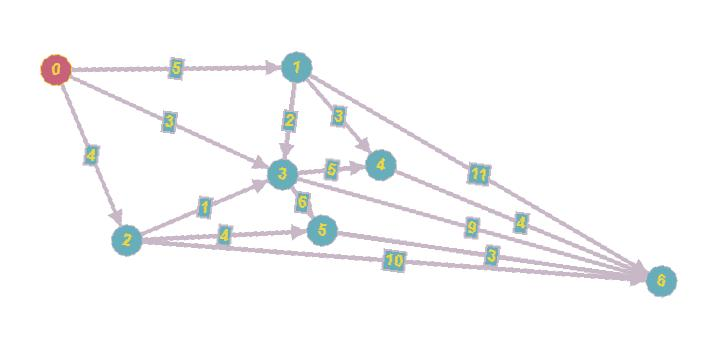

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [6]:
#Viaje por el rio - Programación dinámica
import math

# Definición de la matriz de tarifas entre los nodos
TARIFAS = [
    [0, 5, 4, 3, math.inf, 999, 999],   # desde nodo 0
    [999, 0, 999, 2, 3, 999, 11],  # desde nodo 1
    [999, 999, 0, 1, 999, 4, 10],  # desde nodo 2
    [999, 999, 999, 0, 5, 6, 9],   # desde nodo 3
    [999, 999, 999, 999, 0, 999, 4],   # desde nodo 4
    [999, 999, 999, 999, 999, 0, 3],   # desde nodo 5
    [999, 999, 999, 999, 999, 999, 0]  # desde nodo 6
]

# Función para calcular las matrices de precios y rutas
def precios(tarifas):
    N = len(tarifas)  # Número de nodos
    
    # Inicialización de las tablas de precios y rutas
    precios = [[math.inf] * N for _ in range(N)]  # Matriz de precios
    rutas = [[""] * N for _ in range(N)]  # Matriz de rutas
    
    # Construcción de las tablas de precios y rutas
    for i in range(N):
        for j in range(i, N):
            if i == j:
                precios[i][j] = 0  # El costo de ir de un nodo a sí mismo es 0
            else:
                precios[i][j] = tarifas[i][j]  # Inicializa con el costo directo entre nodos
                rutas[i][j] = i  # Inicializa la ruta con el nodo de origen
    
    # Actualiza las tablas utilizando la técnica de programación dinámica
    for k in range(N):
        for i in range(N):
            for j in range(N):
                if precios[i][k] + precios[k][j] < precios[i][j]:
                    precios[i][j] = precios[i][k] + precios[k][j]
                    rutas[i][j] = k  # Actualiza el nodo intermedio en la ruta óptima
    
    return precios, rutas

# Calcula las matrices de precios y rutas
precios_matriz, rutas_matriz = precios(TARIFAS)

# Muestra la matriz de precios
print("PRECIOS")
for fila in precios_matriz:
    print(fila)

# Muestra la matriz de rutas
print("\nRUTAS")
for fila in rutas_matriz:
    print(fila)

# Función para reconstruir la ruta óptima entre dos nodos
def reconstruir_ruta(rutas, inicio, fin):
    if inicio == fin:
        return [inicio]  # Si el nodo de inicio es igual al nodo final, la ruta es el nodo mismo
    elif rutas[inicio][fin] == inicio:
        return [inicio, fin]  # Si no hay nodo intermedio, la ruta es directa
    else:
        k = rutas[inicio][fin]  # Nodo intermedio
        # Reconstruye la ruta dividiéndola en dos partes, antes y después del nodo intermedio
        return reconstruir_ruta(rutas, inicio, k) + reconstruir_ruta(rutas, k, fin)[1:]

# Prueba 1: Ruta de nodo 0 a nodo 6
print("\nPrueba 1: Ruta de nodo 0 a nodo 6")
ruta_1 = reconstruir_ruta(rutas_matriz, 0, 6)
print(f"Ruta: {ruta_1}, Costo: {precios_matriz[0][6]}")

# Prueba 2: Ruta de nodo 1 a nodo 5
print("\nPrueba 2: Ruta de nodo 1 a nodo 5")
ruta_2 = reconstruir_ruta(rutas_matriz, 1, 5)
print(f"Ruta: {ruta_2}, Costo: {precios_matriz[1][5]}")




PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[inf, 0, 999, 2, 3, 8, 7]
[inf, inf, 0, 1, 6, 4, 7]
[inf, inf, inf, 0, 5, 6, 9]
[inf, inf, inf, inf, 0, 999, 4]
[inf, inf, inf, inf, inf, 0, 3]
[inf, inf, inf, inf, inf, inf, 0]

RUTAS
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']

Prueba 1: Ruta de nodo 0 a nodo 6
Ruta: [0, 2, 5, 6], Costo: 11

Prueba 2: Ruta de nodo 1 a nodo 5
Ruta: [1, 3, 5], Costo: 8


## Descenso del gradiente

In [12]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [13]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

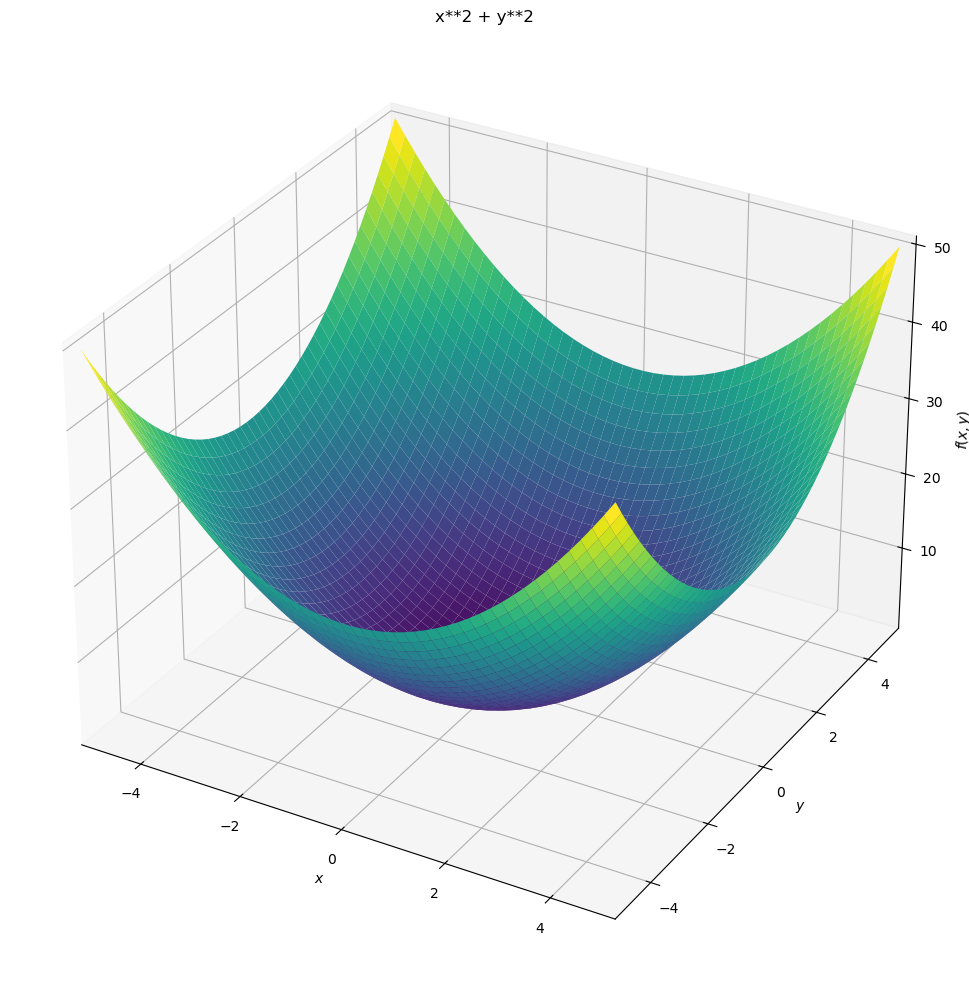

In [14]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

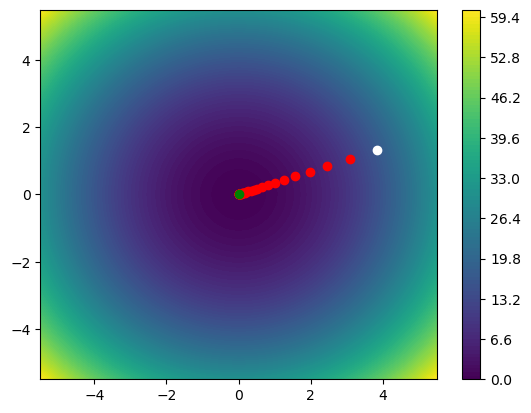

Solucion: [5.485177147108201e-05, 1.881741798900532e-05] 3.3628120532887474e-09

Prueba 1: Tasa de aprendizaje 0.1, punto inicial aleatorio
Solucion: [5.754585243955624e-06, 6.521515280131893e-05] 4.286131406229327e-09

Prueba 2: Tasa de aprendizaje 0.05, punto inicial aleatorio
Solucion: [-0.02190610148571899, 0.015212062924603314] 0.0007112841407247105

Prueba 3: Tasa de aprendizaje 0.01, punto inicial aleatorio
Solucion: [-0.5239493468828148, 1.3494330987321397] 2.095492606052753


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definición de la función que se va a optimizar
def f(v):
    x, y = v
    return x**2 + y**2

# Definición de la función para calcular el gradiente
def df(v):
    x, y = v
    return np.array([2*x, 2*y])

# Parámetros para la generación del mapa de niveles
resolucion = 100
rango = 5.5

# Generación de la cuadrícula de puntos
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

# Cálculo de los valores de Z en la cuadrícula
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generación de un punto aleatorio inicial y se pinta de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje
TA = 0.1

# Iteraciones: 50
for _ in range(50):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibuja el punto final y se pinta de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solucion:", P, f(P))

# Ahora, se preparan tres pruebas diferentes variando las condiciones iniciales y las tasas de aprendizaje

# Prueba 1: Tasa de aprendizaje de 0.1, punto inicial aleatorio
print("\nPrueba 1: Tasa de aprendizaje 0.1, punto inicial aleatorio")
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
TA = 0.1
for _ in range(50):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
print("Solucion:", P, f(P))

# Prueba 2: Tasa de aprendizaje de 0.05, punto inicial aleatorio
print("\nPrueba 2: Tasa de aprendizaje 0.05, punto inicial aleatorio")
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
TA = 0.05
for _ in range(50):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
print("Solucion:", P, f(P))

# Prueba 3: Tasa de aprendizaje de 0.01, punto inicial aleatorio
print("\nPrueba 3: Tasa de aprendizaje 0.01, punto inicial aleatorio")
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
TA = 0.01
for _ in range(50):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
print("Solucion:", P, f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
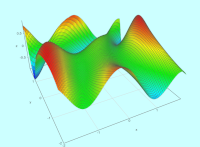


Prueba 1: Tasa de aprendizaje 0.1, iteraciones 50, punto inicial aleatorio en rango [-1, 1]


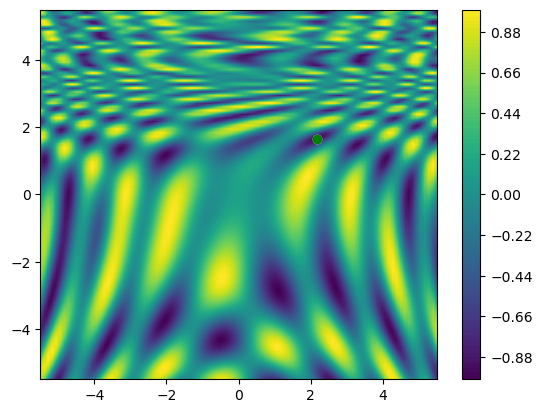

Solución Prueba 1: [2.162375698055004, 1.6648531216275286] -0.9969379647203171

Prueba 2: Tasa de aprendizaje 0.05, iteraciones 100, punto inicial aleatorio en rango [-2, 2]


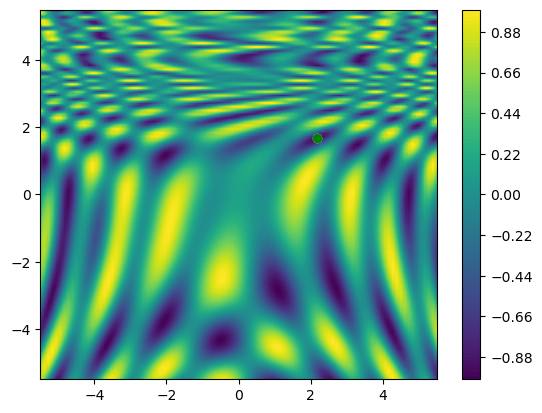

Solución Prueba 2: [2.1706054433750257, 1.668762102520092] -0.9979722604185548

Prueba 3: Tasa de aprendizaje 0.01, iteraciones 200, punto inicial aleatorio en rango [-3, 3]


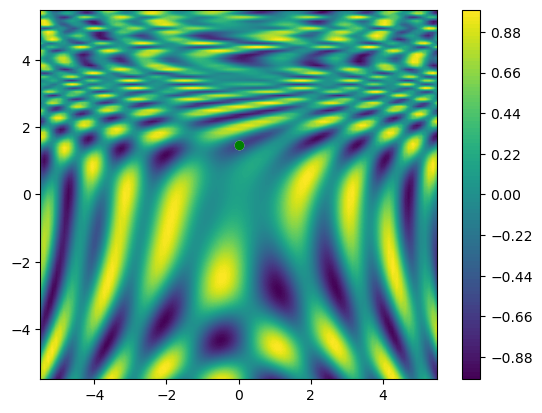

Solución Prueba 3: [0.013949984274021332, 1.4645711820976053] -0.6193988845397929


In [18]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Definimos la función
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Aproximamos el valor del gradiente en un punto por su definición
def df(PUNTO):
    h = 0.01
    T = np.copy(PUNTO)
    grad = np.zeros(2)
    for it, th in enumerate(PUNTO):
        T[it] = T[it] + h
        grad[it] = (f(T) - f(PUNTO)) / h
        T[it] = th  # Reset T[it] to original value
    return grad

# Prepara los datos para dibujar mapa de niveles de Z
def dibujar_mapa(resolucion, rango):
    X = np.linspace(-rango, rango, resolucion)
    Y = np.linspace(-rango, rango, resolucion)
    Z = np.zeros((resolucion, resolucion))
    for ix, x in enumerate(X):
        for iy, y in enumerate(Y):
            Z[iy, ix] = f([x, y])
    return X, Y, Z

# Función para realizar el descenso de gradiente
def descenso_gradiente(TA, iteraciones, punto_inicial):
    P = punto_inicial
    for _ in range(iteraciones):
        grad = df(P)
        P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    return P

# Función para mostrar los resultados
def mostrar_resultados(X, Y, Z, punto_inicial, P_final):
    plt.contourf(X, Y, Z, resolucion)
    plt.colorbar()
    plt.plot(punto_inicial[0], punto_inicial[1], "o", c="white")  # Punto inicial
    plt.plot(P_final[0], P_final[1], "o", c="green")  # Punto final
    plt.show()

# Parámetros para el mapa de niveles
resolucion = 100
rango = 5.5

# Dibujar el mapa de niveles
X, Y, Z = dibujar_mapa(resolucion, rango)

# Prueba 1: Tasa de aprendizaje 0.1, iteraciones 50, punto inicial aleatorio en rango [-1, 1]
print("Prueba 1: Tasa de aprendizaje 0.1, iteraciones 50, punto inicial aleatorio en rango [-1, 1]")
punto_inicial_1 = [random.uniform(-1, 1), random.uniform(-1, 1)]
P_final_1 = descenso_gradiente(0.1, 50, punto_inicial_1)
mostrar_resultados(X, Y, Z, punto_inicial_1, P_final_1)
print("Solución Prueba 1:", P_final_1, f(P_final_1))

# Prueba 2: Tasa de aprendizaje 0.05, iteraciones 100, punto inicial aleatorio en rango [-2, 2]
print("\nPrueba 2: Tasa de aprendizaje 0.05, iteraciones 100, punto inicial aleatorio en rango [-2, 2]")
punto_inicial_2 = [random.uniform(-2, 2), random.uniform(-2, 2)]
P_final_2 = descenso_gradiente(0.05, 100, punto_inicial_2)
mostrar_resultados(X, Y, Z, punto_inicial_2, P_final_2)
print("Solución Prueba 2:", P_final_2, f(P_final_2))

# Prueba 3: Tasa de aprendizaje 0.01, iteraciones 200, punto inicial aleatorio en rango [-3, 3]
print("\nPrueba 3: Tasa de aprendizaje 0.01, iteraciones 200, punto inicial aleatorio en rango [-3, 3]")
punto_inicial_3 = [random.uniform(-3, 3), random.uniform(-3, 3)]
P_final_3 = descenso_gradiente(0.01, 200, punto_inicial_3)
mostrar_resultados(X, Y, Z, punto_inicial_3, P_final_3)
print("Solución Prueba 3:", P_final_3, f(P_final_3))

